In [1]:
from scipy import misc
import numpy as np

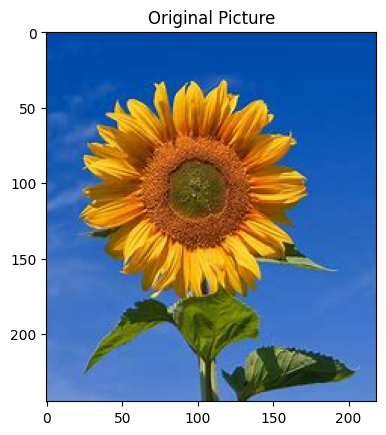

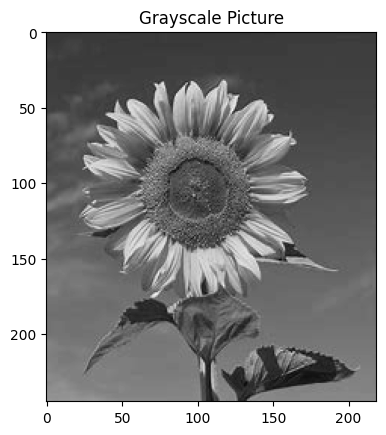

In [13]:
'''import a jpg, show the original and transform it to grayscale, and then to an array'''

from PIL import Image #look up this library
import matplotlib.pyplot as plt


def image_preprocess(image_path):
    #open the image file
    img = Image.open(image_path)

    #show the original picture
    plt.imshow(img)
    plt.title('Original Picture')
    plt.show()
    
    #convert the image to grayscale if it's not already
    img_gray = img.convert('L')
    
    #convert the image to a numpy array
    img_array = np.array(img_gray)

    #show the grayscale image
    plt.imshow(img_gray, cmap='gray')
    plt.title('Grayscale Picture')
    plt.show()

    return img_array

#test
image_path = 'sunflower_test.jpg' #input('enter a file path to the picture: ')
processed_image = image_preprocess(image_path)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 4.000e+00, 5.000e+00,
        8.000e+00, 2.000e+01, 1.700e+01, 3.000e+01, 2.100e+01, 3.400e+01,
        2.500e+01, 4.000e+01, 3.600e+01, 4.300e+01, 3.200e+01, 3.900e+01,
        4.300e+01, 5.400e+01, 6.000e+01, 5.100e+01, 6.300e+01, 6.600e+01,
        6.700e+01, 1.010e+02, 9.100e+01, 9.600e+01, 1.010e+02, 9.200e+01,
        9.900e+01, 1.030e+02, 1.170e+02, 9.100e+01, 1.280e+02, 1.160e+02,
        1.010e+02, 1.020e+02, 1.020e+02, 9.300e+01, 1.030e+02, 9.000e+01,
        1.130e+02, 4.820e+02, 1.319e+03, 1.859e+03, 5.050e+02, 2.285e+03,
        1.322e+03, 5.650e+02, 1.240e+03, 5.140e+02, 7.240e+02, 3.710e+02,
        6.170e+02, 6.110e+02, 4.470e+02, 3.390e+02, 4.090e+02, 5.620e+02,
        4.370e+02, 5.730e+02, 4.490e+0

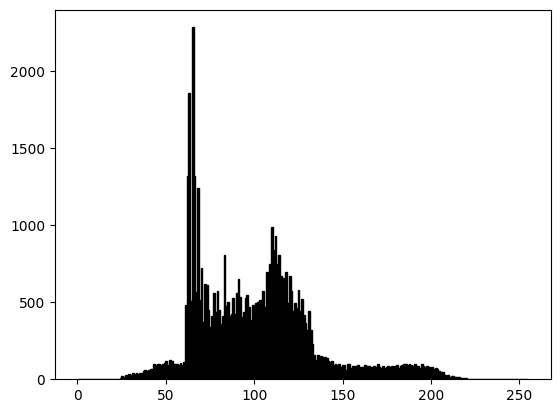

In [12]:
plt.hist(processed_image.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

[[ 95 108 120 ...  99 107 114]
 [ 69  86 102 ...  98 111 121]
 [ 56  73  90 ...  99 111 120]
 ...
 [ 81  85  96 ... 120 119 119]
 [ 78  86 100 ... 119 118 118]
 [ 78  88  99 ... 118 117 116]]


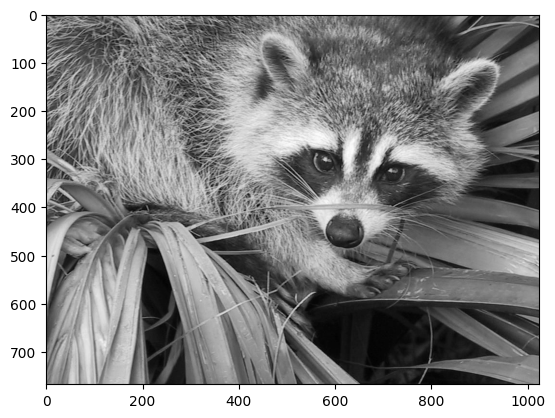

In [11]:
compressed = face / 1.2
compressed = np.floor(compressed)
compressed = compressed.astype(np.uint8)
print(compressed)
plt.imshow(compressed, cmap=plt.cm.gray)

(array([9.5000e+01, 5.7000e+01, 1.3000e+02, 3.9200e+02, 8.3900e+02,
        4.5680e+03, 2.9630e+03, 2.4530e+03, 1.9440e+03, 1.9550e+03,
        4.7430e+03, 2.7750e+03, 3.0730e+03, 2.9730e+03, 3.5650e+03,
        7.0710e+03, 3.4910e+03, 3.3390e+03, 3.2010e+03, 3.1880e+03,
        6.1980e+03, 2.9450e+03, 2.7090e+03, 2.6900e+03, 2.5090e+03,
        4.8320e+03, 2.4200e+03, 2.3560e+03, 2.4050e+03, 2.3250e+03,
        4.7880e+03, 2.3480e+03, 2.3140e+03, 2.3410e+03, 2.4550e+03,
        4.5670e+03, 2.3350e+03, 2.3970e+03, 2.4860e+03, 2.4450e+03,
        4.9560e+03, 2.6530e+03, 2.6170e+03, 2.7310e+03, 2.7670e+03,
        5.7580e+03, 3.0990e+03, 3.2090e+03, 3.1890e+03, 3.3580e+03,
        6.8540e+03, 3.4600e+03, 3.5890e+03, 3.7680e+03, 3.7420e+03,
        7.2220e+03, 3.6390e+03, 3.7820e+03, 3.6560e+03, 3.7170e+03,
        7.5560e+03, 3.8010e+03, 3.8800e+03, 3.7900e+03, 3.8590e+03,
        7.8360e+03, 4.1330e+03, 4.2100e+03, 4.3570e+03, 4.4420e+03,
        9.0290e+03, 4.6370e+03, 4.7820e+03, 4.72

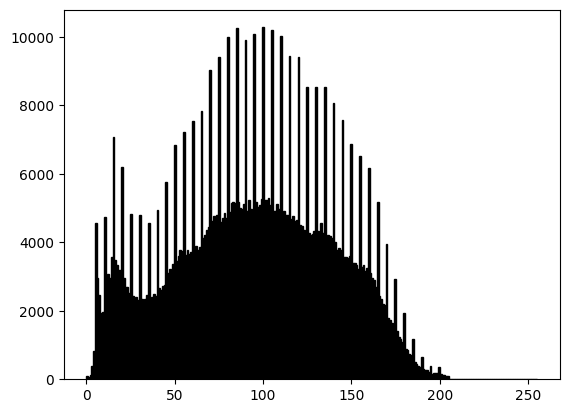

In [12]:
'''optional, might not be in the final solution'''
plt.hist(compressed.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

In [13]:
compressed

array([[ 95, 108, 120, ...,  99, 107, 114],
       [ 69,  86, 102, ...,  98, 111, 121],
       [ 56,  73,  90, ...,  99, 111, 120],
       ...,
       [ 81,  85,  96, ..., 120, 119, 119],
       [ 78,  86, 100, ..., 119, 118, 118],
       [ 78,  88,  99, ..., 118, 117, 116]], dtype=uint8)

In [29]:
'''function to compress the image by the given value'''
def compress_image (arr: np.ndarray, n: int) -> np.ndarray:
    result = np.zeros(shape=(int(arr.shape[0] / n), int(arr.shape[1] / n)))

    for idx, x in np.ndenumerate(result):
        lst = arr[idx[0] * n: (idx[0] + 1) * n, idx[1] * n: (idx[1] + 1) * n]
        result[idx] = np.median(lst)

    return result


    # for row in arr.shape[0]:
    #     for col in arr.shape[1]:
    #         arr[row, col] = arr[row, col] / 1.2

result = compress_image(face, 10)

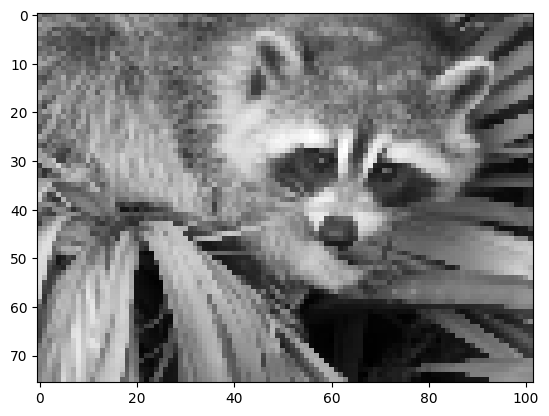

In [30]:
plt.imshow(result, cmap=plt.cm.gray)

(array([ 0.,  0.,  0.,  0.,  0.,  3., 16., 24., 37., 16., 20.,  9., 13.,
        24., 23., 38., 34., 25., 39., 40., 31., 26., 20., 32., 35., 23.,
        35., 25., 18., 26., 12., 18., 20., 22., 25., 21., 20., 19., 15.,
        19., 23., 17., 25., 19., 15., 24., 19., 20., 21., 25., 23., 16.,
        18., 16., 28., 23., 19., 36., 32., 29., 27., 29., 35., 36., 37.,
        33., 33., 26., 25., 41., 34., 25., 40., 36., 32., 34., 32., 38.,
        37., 41., 38., 34., 47., 49., 51., 48., 43., 64., 52., 46., 35.,
        47., 60., 49., 49., 54., 74., 55., 48., 51., 56., 51., 79., 54.,
        61., 59., 50., 57., 63., 55., 54., 78., 56., 50., 56., 72., 59.,
        48., 63., 59., 52., 61., 63., 79., 62., 61., 42., 38., 60., 66.,
        58., 44., 49., 53., 60., 44., 51., 51., 52., 50., 47., 45., 39.,
        53., 41., 46., 53., 42., 49., 63., 42., 37., 47., 34., 43., 37.,
        36., 40., 49., 34., 51., 37., 47., 41., 46., 42., 51., 41., 39.,
        44., 32., 35., 36., 35., 48., 35., 28., 38.

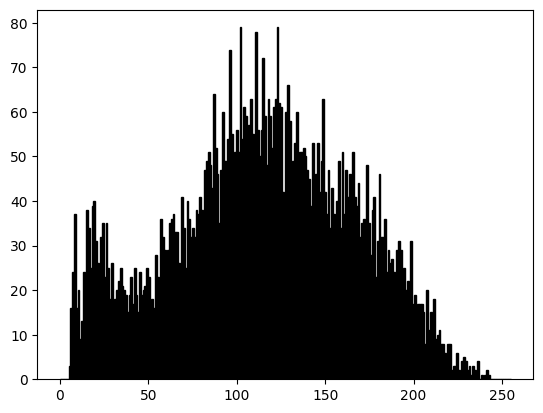

In [31]:
plt.hist(result.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

In [34]:
np.mean(face)

113.48026784261067

In [35]:
np.mean(result)

114.03624871001033

In [36]:
np.diff(face)

array([[ 16,  15,   2, ...,   3,  10,   8],
       [ 21,  19,   7, ...,   9,  16,  12],
       [ 20,  21,   7, ...,  12,  15,  11],
       ...,
       [  5,  13,  15, ..., 255, 255,   0],
       [ 10,  16,  11, ..., 255, 255,   0],
       [ 12,  13,   8, ..., 255, 255, 255]], dtype=uint8)

In [37]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

ValueError: operands could not be broadcast together with shapes (768,1024) (76,102) 